- 20 runs of each per testing cycle
- Start 1 thread through to 128 to see peak and drop off
- Show time taken for thread count
- Then increase unit size once optimal amount of threads is found to see difference of serial and parallel
- Show accuracy for unit size

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

times = [[],[],[]]
calculations = [[],[],[]]

with open('results.txt', 'r') as file:
    for line in file:
        pairs = line.strip().split()
        for idx, pair in enumerate(pairs):
            time, calc = map(float, pair.split(':'))
            times[idx % 3].append(time)
            calculations[idx % 3].append(calc)

df = pd.DataFrame({
    'time_1': times[0],
    'time_2': times[1],
    'time_3': times[2],
    'calc_1': calculations[0],
    'calc_2': calculations[1],
    'calc_3': calculations[2]
})


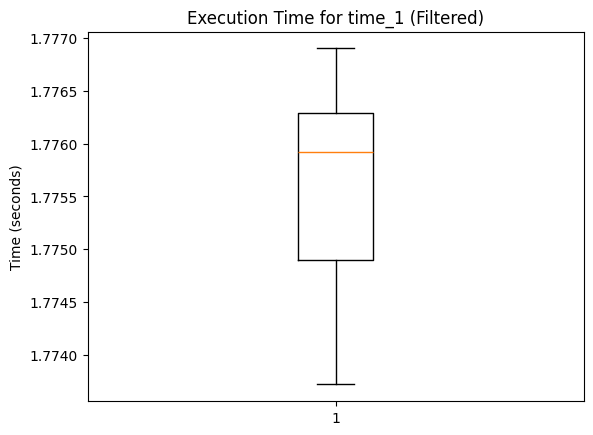

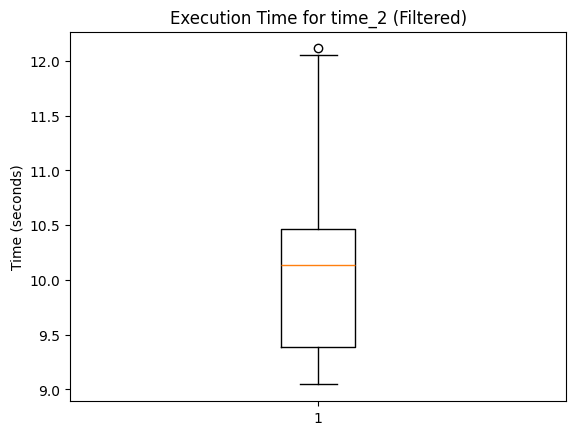

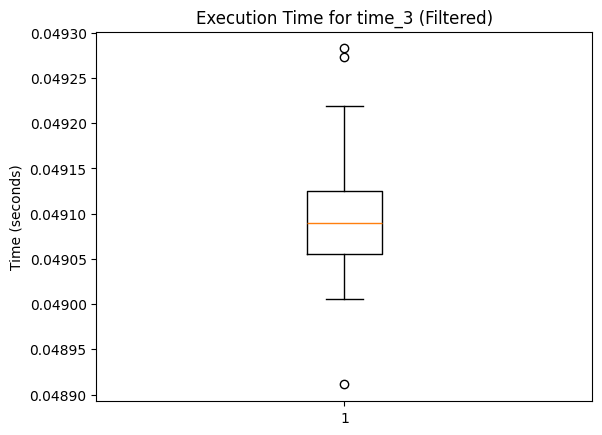

In [2]:
# Loop through time columns to filter out outliers and plot
for time_col in ['time_1', 'time_2', 'time_3']:
    Q1 = df[time_col].quantile(0.25)
    Q3 = df[time_col].quantile(0.75)
    IQR = Q3 - Q1

    # Filter out outliers using the IQR rule
    filtered_data = df[time_col][~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

    # Plot the boxplot for the filtered data
    plt.boxplot(filtered_data)
    plt.title(f"Execution Time for {time_col} (Filtered)")
    plt.ylabel("Time (seconds)")
    plt.show()

In [ ]:
accuracy = []